In [8]:
import os
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import time
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
%matplotlib inline

**Loading the data from keras**

In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

**Test train split**

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2)

**Function to flatten out the $28\times 28$ matrix**

In [21]:
def unravel_array(mat):
    new_mat = np.zeros((mat.shape[0], mat.shape[1]* mat.shape[2]))
    for i in range(mat.shape[0]):
        new_mat[i] = mat[i].ravel()

    return np.array(new_mat)

**The following pipeline**
* It defines k-means clustering for specified k
* It fit and transform data into the cluster distance space
* It finds the data point closest to each centroid
* It represents each cluster using that datapoint and its label
* It applies k-means to predict labels on the validation set
* It finds the accuracy scores

In [22]:
def pipe_train_validate(k, x_train, y_train, x_valid, y_valid, rs=56):
    x_train_new = unravel_array(x_train)
    x_valid_new = unravel_array(x_valid)
    kmeans = KMeans(n_clusters=k, random_state=rs)
    x_train_clus_dist_space = kmeans.fit_transform(x_train_new)
    rep_class_idx = np.argmin(x_train_clus_dist_space, axis=0)
    x_rep_class = x_train_new[rep_class_idx]
    y_rep_class = y_train[rep_class_idx]

    test_clus_pred = kmeans.predict(x_valid_new)
    y_valid_pred = []
    for i in test_clus_pred:
        y_valid_pred.append(y_rep_class[i])
    
    accuracy = sklearn.metrics.accuracy_score(y_valid, y_valid_pred)

    return kmeans, x_rep_class, y_rep_class, y_valid_pred, accuracy

**The following pipeline is used for the test data as follows**

* It transforms each data point from 28x28 array to a single 784-dim vector
* It Uses the K-Means model to predict the labels for Test Dataset
* It Checks the accuracy scores

    
    
    



In [23]:
def pipe_test_predict(kmeans, x_test, y_test, y_rep_class):
    x_test_new = unravel_array(x_test)
    
    test_clus_pred = kmeans.predict(x_test_new)
    y_test_pred = []
    for i in test_clus_pred:
        y_test_pred.append(y_rep_class[i])
    
    accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)

    return y_test_pred, accuracy

**The code is tested on three instances**
* One with 25 labels
* Second with 45 labels
* Third one with 85 labels

In [24]:
%%time
k = 25
kmeans_model, x_rep_class, y_rep_class, y_valid_pred, valid_accuracy = pipe_train_validate(k, x_train, y_train, x_valid, y_valid)
valid_accuracy

CPU times: user 3min 32s, sys: 48.6 s, total: 4min 21s
Wall time: 1min 36s


0.5933333333333334

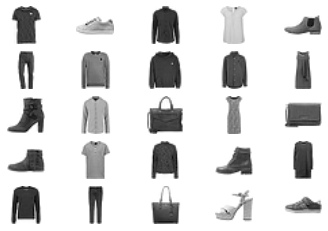

In [26]:
for i in range(x_rep_class.shape[0]):
    plt.subplot(k // 5, 5, i + 1)
    plt.imshow(x_rep_class[i].reshape(28, 28), interpolation="bilinear", cmap="binary")
    plt.axis('off')

plt.show()

In [27]:
y_rep_class_lab = []
for i in y_rep_class:
    y_rep_class_lab.append(y_labels[i])

y_rep_class_lab

['T-shirt/top',
 'Sneaker',
 'Shirt',
 'Shirt',
 'Ankle Boot',
 'Trouser',
 'Pullover',
 'Pullover',
 'Shirt',
 'Dress',
 'Ankle Boot',
 'Shirt',
 'Bag',
 'Dress',
 'Bag',
 'Ankle Boot',
 'T-shirt/top',
 'Pullover',
 'Ankle Boot',
 'Dress',
 'Pullover',
 'Trouser',
 'Bag',
 'Sandal',
 'Sneaker']

In [28]:
y_test_pred, test_accuracy = pipe_test_predict(kmeans_model, x_test, y_test, y_rep_class)
test_accuracy

0.5895

In [29]:
%%time
k = 45
kmeans_model, x_rep_class, y_rep_class, y_valid_pred, valid_accuracy = pipe_train_validate(k, x_train, y_train, x_valid, y_valid)
valid_accuracy

CPU times: user 5min 47s, sys: 1min 20s, total: 7min 8s
Wall time: 2min 12s


0.642

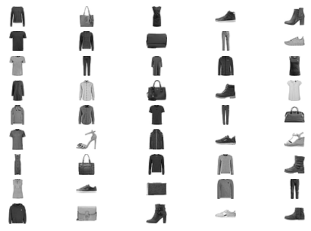

In [30]:
for i in range(x_rep_class.shape[0]):
    plt.subplot(k // 5, 5, i + 1)
    plt.imshow(x_rep_class[i].reshape(28, 28), interpolation="bilinear", cmap="binary")
    plt.axis('off')

plt.show()

In [31]:
y_test_pred, test_accuracy = pipe_test_predict(kmeans_model, x_test, y_test, y_rep_class)
test_accuracy

0.6469

In [32]:
%%time
k = 85
kmeans_model, x_rep_class, y_rep_class, y_valid_pred, valid_accuracy = pipe_train_validate(k, x_train, y_train, x_valid, y_valid)
valid_accuracy

CPU times: user 10min 26s, sys: 2min 42s, total: 13min 9s
Wall time: 3min 34s


0.70525

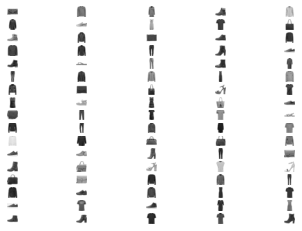

In [33]:
for i in range(x_rep_class.shape[0]):
    plt.subplot(k // 5, 5, i + 1)
    plt.imshow(x_rep_class[i].reshape(28, 28), interpolation="bilinear", cmap="binary")
    plt.axis('off')

plt.show()

In [34]:
y_test_pred, test_accuracy = pipe_test_predict(kmeans_model, x_test, y_test, y_rep_class)
test_accuracy

0.699